In [350]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris


import scipy.stats
import scipy.optimize
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['flower'])

In [352]:
df['flower'].value_counts()

2.0    50
1.0    50
0.0    50
Name: flower, dtype: int64

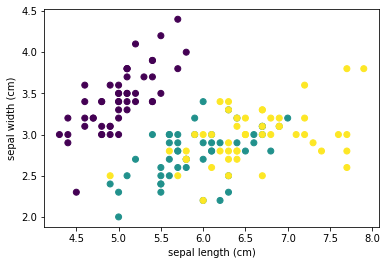

In [353]:
features = iris.data.T
#features
sepal_length = features[0]
sepal_width  = features[1]
petal_length = features[2]
petal_width  = features[3]

sepal_length_label = iris.feature_names[0]
sepal_width_label  = iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label  = iris.feature_names[3]

plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.show()

In [354]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [355]:
df.head() #flower_type given by 0,1,2 as setosa, versicolor, virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [356]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [357]:
#cross_validatation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train, y_train)
#knn.score(X_test, y_test)

from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

def get_Score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [358]:
#get_Score(knn, X_train, X_test, y_train, y_test)
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5)
scores_knn = []

for train_indx,test_indx in kf.split(iris.data):
     X_train, X_test, y_train, y_test = iris.data[train_indx], iris.data[test_indx], iris.target[train_indx],\
                                      iris.target[test_indx]
     
     scores_knn.append(get_Score(knn, X_train, X_test, y_train, y_test))
     

In [359]:
scores_knn

[1.0, 0.9210526315789473, 0.918918918918919, 0.7027027027027027]

In [349]:
from sklearn.model_selection import cross_val_score 
cross_val_score(knn,iris.data,iris.target)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])